# Regressin Project

برای این پروژه ما اطلاعات تقریبا ۴۰۰۰ آپارتمان در تهران را تهیه کرده ایم. تمامی داده ها کاملا واقعی هستند. وظیفه شما این است که با استفاده از ویژگی های دیتاست که در ادامه به تشریح آنها پرداخته‌ایم قیمت به دلار یا تومان را تخمین بزنید. داده ها درون فایل housePrice.csv ذخیره شده اند.

متراژ خانه به متر (Area)
تعداد اتاق خواب (Room)
پارکینگ دارد یا خیر (Parking)
انباری دارد یا خیر (Warehouse)
آسانسور دارد یا خیر (Elevator)
آدرس حدودی در تهران (Address)
قیمت به تومان (Price)
قیمت به دلار (Price(USD))
در این دیتاست بعضی از خانه ها آدرس ندارند و همینطور متراژ بعضی از خانه ها اشتباه وارد شده (مقدار بسیار بزرگی دارند). به این منظور این موارد را نیز باید مدیریت کنید و آن ها را از دیتاست خود حذف کنید.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('housePrice.csv')
df.head() #    3479

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### clean the data

In [3]:
df.dropna(subset=['Address'], inplace=True)
df['Area'] = df['Area'].str.replace(',', '').astype(int)
new_columns = {"Price(USD)": "PriceUSD"}
df = df.rename(columns=new_columns)
df = df[df['Area'] <= 500]
df = df[df['PriceUSD'] <= 300000]
df.head()    # 2923

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### plot area and price(usd)

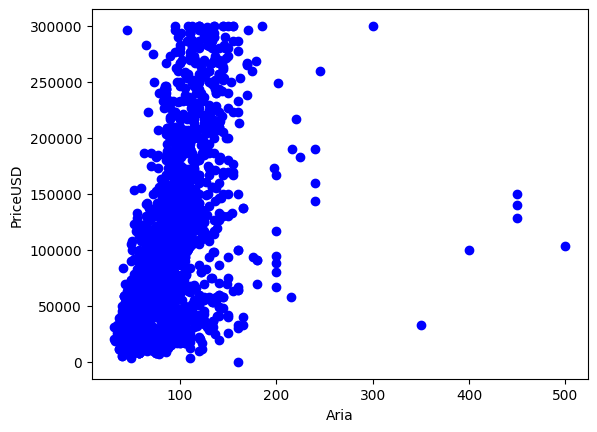

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.Area, train.PriceUSD, color='blue')
plt.xlabel("Aria")
plt.ylabel("PriceUSD")
plt.show()

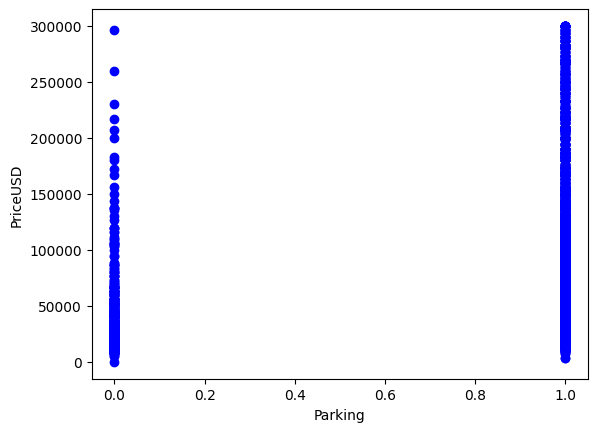

In [5]:
plt.scatter(train.Parking, train.PriceUSD, color='blue')
plt.xlabel("Parking")
plt.ylabel("PriceUSD")
plt.show()

### simple linear regression { NOT GOOD }

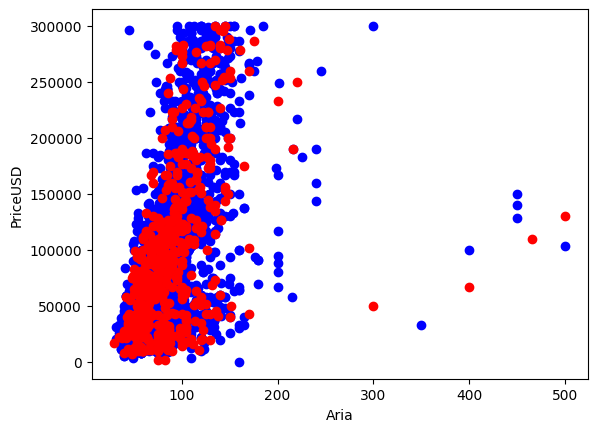

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Area, train.PriceUSD, color='blue')
ax1.scatter(test.Area, test.PriceUSD, color='red')
plt.xlabel("Aria")
plt.ylabel("PriceUSD")
plt.show()

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['PriceUSD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1030.57843036]]
Intercept:  [6320.60807081]


Text(0, 0.5, 'PriceUSD')

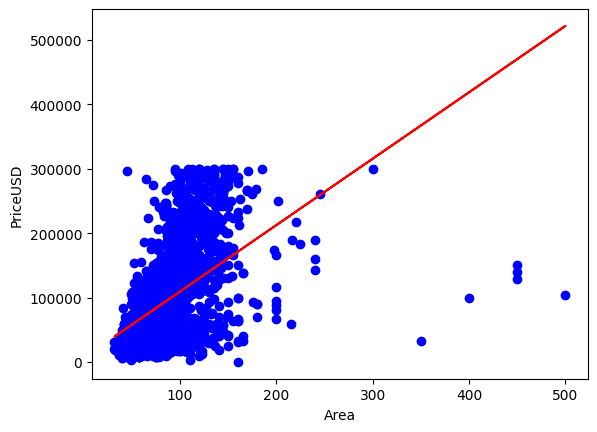

In [8]:
plt.scatter(train.Area, train.PriceUSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("PriceUSD")

In [9]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['PriceUSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

my_test = regr.predict(np.array([[102]]))
print('\n', my_test)

Mean absolute error: 47814.66
Residual sum of squares (MSE): 4375631318.22
R2-score: 0.17

 [[111439.60796752]]


### multiple linear regression

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
train_y = np.asanyarray(train[['PriceUSD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[  693.95539825 16825.93851366 29268.09617223 15607.25337912
  22263.77738768]]
Intercept:  [-50906.0966517]


In [11]:
y_hat= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y = np.asanyarray(test[['PriceUSD']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 3674640784.63
Variance score: 0.30


/home/niknam1382/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
